## Imports

In [9]:
import sys
sys.path.append("../")

In [10]:
import os
import json

import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

import torch
import lightning
from lightning.pytorch.callbacks.model_checkpoint import ModelCheckpoint
from lightning.pytorch.callbacks.early_stopping import EarlyStopping

from monai_unet_cv_heart import Net


In [11]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device = ", device)
torch.backends.cudnn.benchmark = True

device =  cuda


In [12]:
PATH = "E:\\Visual Studio\\Task02_Heart\\"
K_FOLDS = 5

In [13]:
torch.set_float32_matmul_precision('medium')
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Function for plotting the results for each fold

In [14]:
def plot_results(net, fold):
    plt.figure("train", (12, 6))
    plt.subplot(1, 3, 1)
    plt.title("Average Loss per Epoch Training")
    x = [i for i in range(0,len(net.epoch_train_loss))]
    y = net.epoch_train_loss
    plt.xlabel("Epochs")
    plt.plot(x, y)
    plt.subplot(1, 3, 2)
    plt.title("Average Loss per Epoch Validation")
    # skip first epoch for validation loss as it is very high
    x = [i for i in range(0,len(net.epoch_val_loss)-1)]
    y = net.epoch_val_loss[1:]
    plt.xlabel("Epochs")
    plt.plot(x, y)
    plt.subplot(1, 3, 3)
    plt.title("Val Mean Dice")
    x = [i for i in range(0,len(net.metric_values))]
    y = net.metric_values
    plt.xlabel("Epochs")
    plt.plot(x, y)
    plt.suptitle(f"Results for Fold {fold}")
    plt.show()

## Do the Crossvalidation

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params
---------------------------------------------
0 | _model        | UNet       | 4.8 M 
1 | loss_function | DiceCELoss | 0     
---------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.236    Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]current epoch: 0 current val_loss: 1.4202661514282227 current mean dice: 0.0085
best mean dice: 0.0085 at epoch: 0
Epoch 0: 100%|██████████| 28/28 [00:53<00:00,  1.90s/it, v_num=5]          current epoch: 0 current val_loss: 1.4657542705535889 current mean dice: 0.0081
best mean dice: 0.0085 at epoch: 0
Epoch 1: 100%|██████████| 28/28 [00:09<00:00,  2.82it/s, v_num=5]current epoch: 1 current val_loss: 1.3835196495056152 current mean dice: 0.0115
best mean dice: 0.0115 at epoch: 1
Epoch 2: 100%|██████████| 28/28 [00:09<00:00,  3.06it/s, v_num=5]current epoch: 2 current val_loss: 1.3510777950286865 current mean dice: 0.0159
best mean dice: 0.0159 at epoch: 2
Epoch 3: 100%|██████████| 28/28 [00:09<00:00,  2.84it/s, v_num=5]current epoch: 3 current val_loss: 1.3073149919509888 current mean dice: 0.0223
best mean dice: 0.0223 at epoch: 3
Epoch 4: 100%|██████████| 28/28 [00:09<00:00,  3.01it/s, v_num=5]current epoch: 

`Trainer.fit` stopped: `max_epochs=60` reached.


Epoch 59: 100%|██████████| 28/28 [00:08<00:00,  3.15it/s, v_num=5]


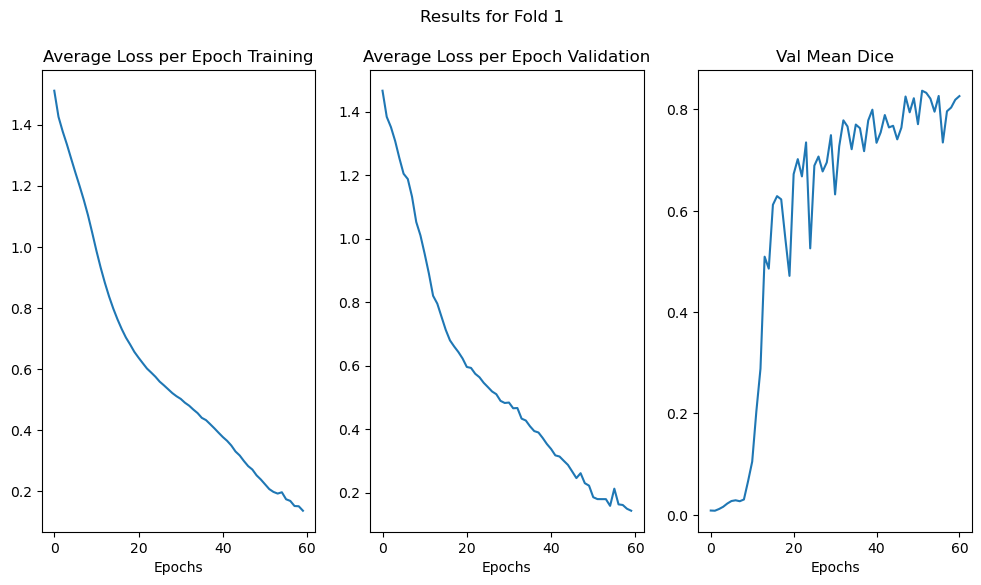

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params
---------------------------------------------
0 | _model        | UNet       | 4.8 M 
1 | loss_function | DiceCELoss | 0     
---------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.236    Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  5.16it/s]current epoch: 0 current val_loss: 1.2363436222076416 current mean dice: 0.0174
best mean dice: 0.0174 at epoch: 0
Epoch 0: 100%|██████████| 28/28 [00:55<00:00,  1.99s/it, v_num=6]          current epoch: 0 current val_loss: 1.241858959197998 current mean dice: 0.0269
best mean dice: 0.0269 at epoch: 0
Epoch 1: 100%|██████████| 28/28 [00:10<00:00,  2.63it/s, v_num=6]current epoch: 1 current val_loss: 1.1579999923706055 current mean dice: 0.0346
best mean dice: 0.0346 at epoch: 1
Epoch 2: 100%|██████████| 28/28 [00:09<00:00,  3.05it/s, v_num=6]current epoch: 2 current val_loss: 1.0939154624938965 current mean dice: 0.0458
best mean dice: 0.0458 at epoch: 2
Epoch 3: 100%|██████████| 28/28 [00:09<00:00,  3.07it/s, v_num=6]current epoch: 3 current val_loss: 1.0381721258163452 current mean dice: 0.0687
best mean dice: 0.0687 at epoch: 3
Epoch 4: 100%|██████████| 28/28 [00:10<00:00,  2.55it/s, v_num=6]current epoch: 4

`Trainer.fit` stopped: `max_epochs=60` reached.


Epoch 59: 100%|██████████| 28/28 [00:11<00:00,  2.43it/s, v_num=6]


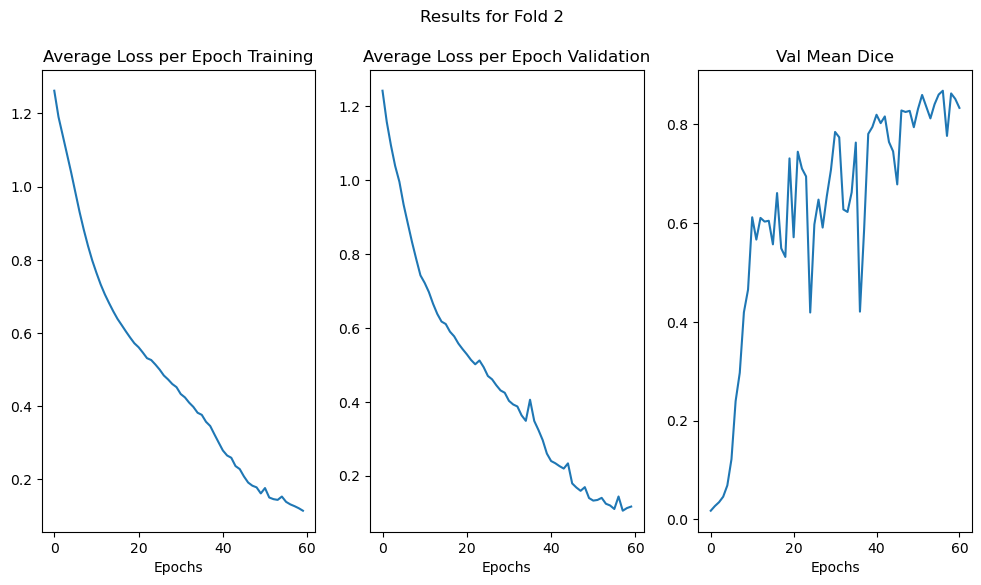

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params
---------------------------------------------
0 | _model        | UNet       | 4.8 M 
1 | loss_function | DiceCELoss | 0     
---------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.236    Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]current epoch: 0 current val_loss: 1.3843142986297607 current mean dice: 0.0091
best mean dice: 0.0091 at epoch: 0
Epoch 0: 100%|██████████| 28/28 [00:54<00:00,  1.94s/it, v_num=7]          current epoch: 0 current val_loss: 1.1152864694595337 current mean dice: 0.0252
best mean dice: 0.0252 at epoch: 0
Epoch 1: 100%|██████████| 28/28 [00:09<00:00,  3.09it/s, v_num=7]current epoch: 1 current val_loss: 1.0043199062347412 current mean dice: 0.0595
best mean dice: 0.0595 at epoch: 1
Epoch 2: 100%|██████████| 28/28 [00:08<00:00,  3.26it/s, v_num=7]current epoch: 2 current val_loss: 0.9547229409217834 current mean dice: 0.1057
best mean dice: 0.1057 at epoch: 2
Epoch 3: 100%|██████████| 28/28 [00:09<00:00,  3.06it/s, v_num=7]current epoch: 3 current val_loss: 0.9027470350265503 current mean dice: 0.1967
best mean dice: 0.1967 at epoch: 3
Epoch 4: 100%|██████████| 28/28 [00:08<00:00,  3.33it/s, v_num=7]current epoch: 

`Trainer.fit` stopped: `max_epochs=60` reached.


Epoch 59: 100%|██████████| 28/28 [00:10<00:00,  2.67it/s, v_num=7]


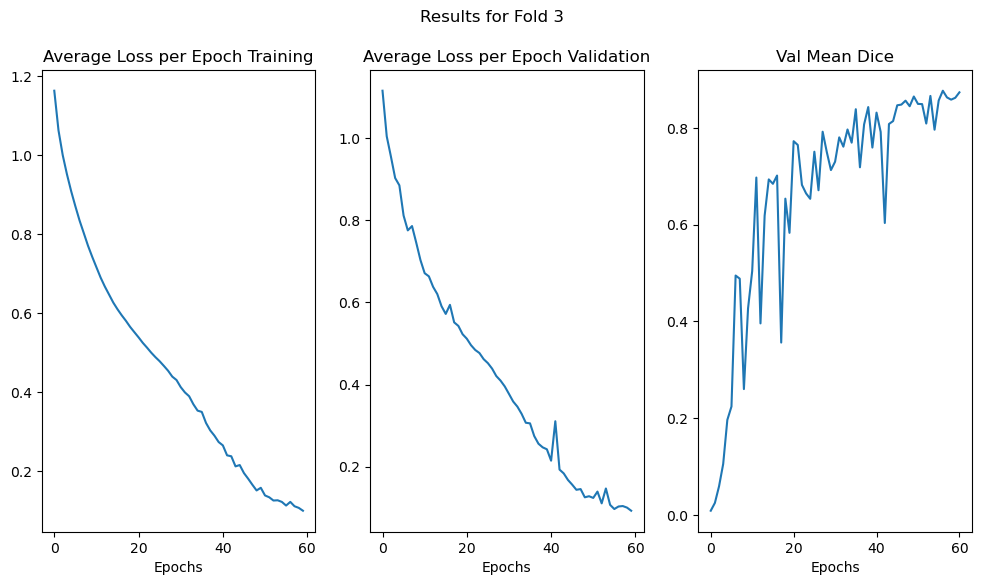

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params
---------------------------------------------
0 | _model        | UNet       | 4.8 M 
1 | loss_function | DiceCELoss | 0     
---------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.236    Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]current epoch: 0 current val_loss: 1.2496836185455322 current mean dice: 0.0216
best mean dice: 0.0216 at epoch: 0
Epoch 0: 100%|██████████| 30/30 [00:55<00:00,  1.84s/it, v_num=8]          current epoch: 0 current val_loss: 1.2454384565353394 current mean dice: 0.0281
best mean dice: 0.0281 at epoch: 0
Epoch 1: 100%|██████████| 30/30 [00:10<00:00,  2.86it/s, v_num=8]current epoch: 1 current val_loss: 1.1280101537704468 current mean dice: 0.0581
best mean dice: 0.0581 at epoch: 1
Epoch 2: 100%|██████████| 30/30 [00:09<00:00,  3.08it/s, v_num=8]current epoch: 2 current val_loss: 1.0639880895614624 current mean dice: 0.1596
best mean dice: 0.1596 at epoch: 2
Epoch 3: 100%|██████████| 30/30 [00:10<00:00,  2.94it/s, v_num=8]current epoch: 3 current val_loss: 0.9948703050613403 current mean dice: 0.3511
best mean dice: 0.3511 at epoch: 3
Epoch 4: 100%|██████████| 30/30 [00:09<00:00,  3.16it/s, v_num=8]current epoch: 

`Trainer.fit` stopped: `max_epochs=60` reached.


Epoch 59: 100%|██████████| 30/30 [00:10<00:00,  2.85it/s, v_num=8]


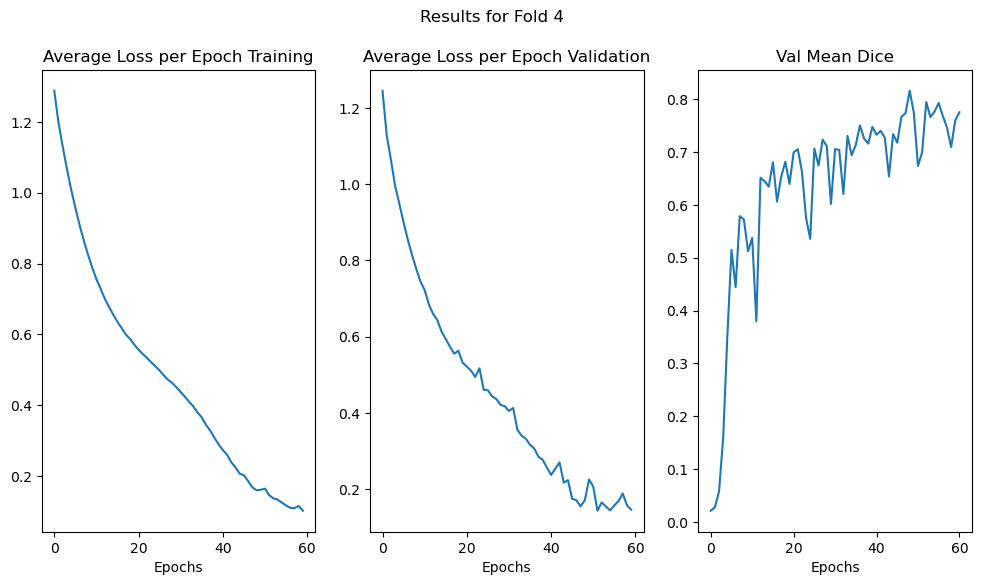

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type       | Params
---------------------------------------------
0 | _model        | UNet       | 4.8 M 
1 | loss_function | DiceCELoss | 0     
---------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.236    Total estimated model params size (MB)


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00,  4.59it/s]current epoch: 0 current val_loss: 1.4234404563903809 current mean dice: 0.0046
best mean dice: 0.0046 at epoch: 0
Epoch 0: 100%|██████████| 30/30 [00:56<00:00,  1.87s/it, v_num=9]          current epoch: 0 current val_loss: 1.3221546411514282 current mean dice: 0.0081
best mean dice: 0.0081 at epoch: 0
Epoch 1: 100%|██████████| 30/30 [00:08<00:00,  3.48it/s, v_num=9]current epoch: 1 current val_loss: 1.240037441253662 current mean dice: 0.0136
best mean dice: 0.0136 at epoch: 1
Epoch 2: 100%|██████████| 30/30 [00:09<00:00,  3.12it/s, v_num=9]current epoch: 2 current val_loss: 1.1770634651184082 current mean dice: 0.0414
best mean dice: 0.0414 at epoch: 2
Epoch 3: 100%|██████████| 30/30 [00:10<00:00,  3.00it/s, v_num=9]current epoch: 3 current val_loss: 1.1111091375350952 current mean dice: 0.0754
best mean dice: 0.0754 at epoch: 3
Epoch 4: 100%|██████████| 30/30 [00:09<00:00,  3.04it/s, v_num=9]current epoch: 4

`Trainer.fit` stopped: `max_epochs=60` reached.


Epoch 59: 100%|██████████| 30/30 [00:10<00:00,  2.99it/s, v_num=9]


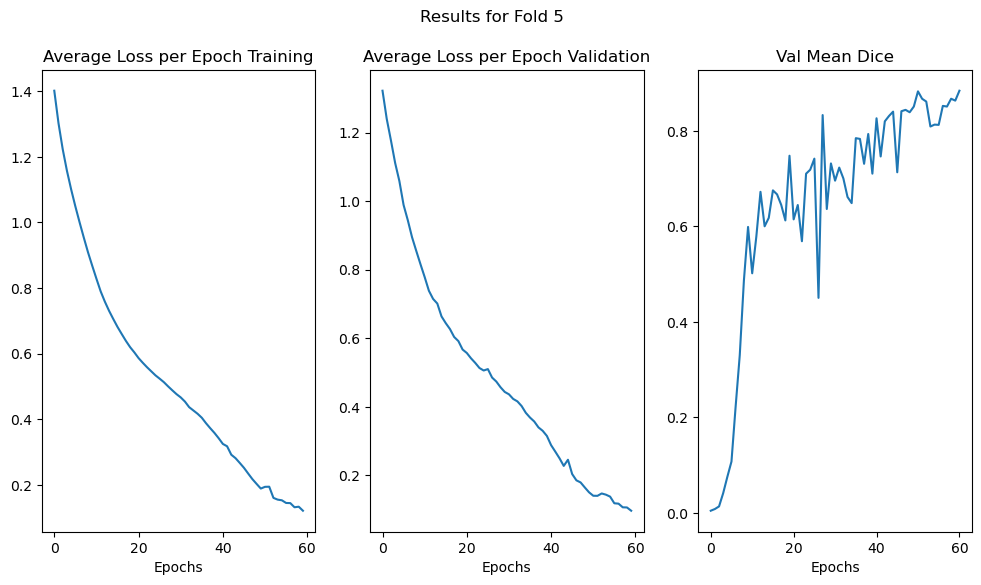

In [15]:
with open(PATH + "dataset.json", 'r') as f:
    data = json.load(f)

test_size = int(0.1 * len(data["training"]))
for i,  entry in enumerate(data["training"]):
        entry['image'] = os.path.abspath(os.path.join(PATH, entry['image']))
        entry['label'] = os.path.abspath(os.path.join(PATH, entry['label']))
test_data = data["training"][:test_size]
train_val_data = data["training"][test_size:]
kf = KFold(n_splits=K_FOLDS)

nets = []

for i, (train_index, val_index) in enumerate(kf.split(train_val_data), 1):
    data['training'] = [train_val_data[idx] for idx in train_index]
    data['validation'] = [train_val_data[idx] for idx in val_index]
    data['test'] = test_data

    # initialise the LightningModule
    net = Net(device=device, data=data, augmentation=True)

    # set up checkpoints
    #checkpoint_callback = ModelCheckpoint(dirpath="./heart_data_lightning_models/", filename='{epoch}-{val_loss:.2f}-{val_dice:.2f}', monitor="val_dice", mode="max")
    early_stopping_callback = EarlyStopping(monitor="val_loss", mode="min", patience=60)
    max_epochs = 60

    # initialise Lightning's trainer.
    trainer = lightning.Trainer(
        devices=[0],
        max_epochs=max_epochs,
        callbacks=[early_stopping_callback],
        log_every_n_steps=4,
    )

    # train
    trainer.fit(net)

    # TODO add plot of each fold validation metric
    plot_results(net, i)
    nets.append(net)

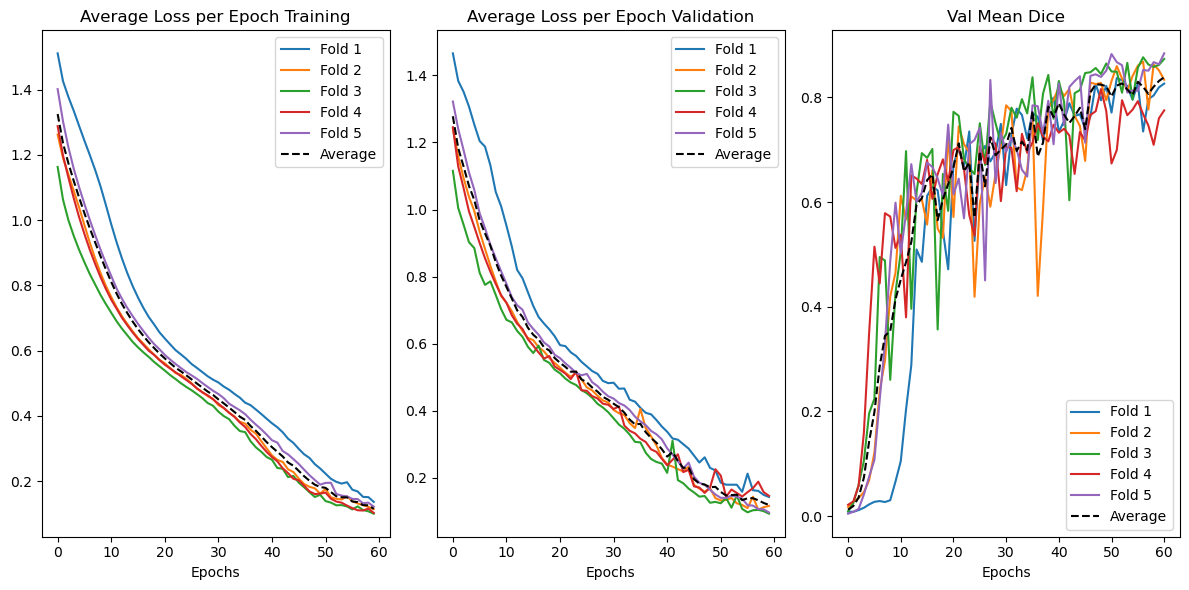

In [16]:
plt.figure("Training & Validation", (12, 6))

# Plot Average Loss per Epoch Training for all networks
plt.subplot(1, 3, 1)
plt.title("Average Loss per Epoch Training")
plt.xlabel("Epochs")
all_train_losses = []

for j, net in enumerate(nets):
    x = [i for i in range(len(net.epoch_train_loss))]
    y = net.epoch_train_loss
    plt.plot(x, y, label=f'Fold {j+1}')
    all_train_losses.append(y)

# Calculate the average for training loss
avg_train_loss = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*all_train_losses)]
plt.plot(x, avg_train_loss, '--', color='black', label='Average')

plt.legend()

# Plot Average Loss per Epoch Validation for all networks
plt.subplot(1, 3, 2)
plt.title("Average Loss per Epoch Validation")
plt.xlabel("Epochs")
all_val_losses = []

for j, net in enumerate(nets):
    x = [i for i in range(len(net.epoch_val_loss) - 1)]
    y = net.epoch_val_loss[1:]  # Skip first epoch
    plt.plot(x, y, label=f'Fold {j+1}')
    all_val_losses.append(y)

# Calculate the average for validation loss
avg_val_loss = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*all_val_losses)]
plt.plot(x, avg_val_loss, '--', color='black', label='Average')

plt.legend()

# Plot Val Mean Dice for all networks
plt.subplot(1, 3, 3)
plt.title("Val Mean Dice")
plt.xlabel("Epochs")
all_dice_scores = []

for j, net in enumerate(nets):
    x = [i for i in range(len(net.metric_values))]
    y = net.metric_values
    plt.plot(x, y, label=f'Fold {j+1}')
    all_dice_scores.append(y)

# Calculate the average for mean dice
avg_dice_score = [sum(epoch_scores) / len(epoch_scores) for epoch_scores in zip(*all_dice_scores)]
plt.plot(x, avg_dice_score, '--', color='black', label='Average')

plt.legend()

plt.tight_layout()
plt.show()
